1. DATA COLLOECTION
2. IMPORT LIABRARIES

In [1]:

import pandas as pd  # For data handling and manipulation
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For more attractive visualizations
from sklearn.model_selection import train_test_split  # For splitting the dataset into training and test sets
from sklearn.preprocessing import LabelEncoder  # For encoding categorical variables
from sklearn.linear_model import LogisticRegression  # For building the classification model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve  # For model evaluation

In [2]:
sheet_url = ("https://docs.google.com/spreadsheets/d/1wLXAt2bZEGKIeE_mvg1zYUSAfQCjkrDOREjLKxL55ZE/edit?gid=1416055552#gid=1416055552")

In [3]:
import pandas as pd

# Modify your Google Sheets URL
sheet_url = "https://docs.google.com/spreadsheets/d/1wLXAt2bZEGKIeE_mvg1zYUSAfQCjkrDOREjLKxL55ZE/export?format=csv"

# Read the CSV into a DataFrame
df = pd.read_csv(sheet_url)

# Display the first few rows
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

2. DATA PREPROCESSING

In [5]:
# Menampilkan informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
df.duplicated().sum()

0

In [8]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [9]:
cat_cols

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [10]:
num_cols

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [11]:
for col in cat_cols:
    print(f"{col} has {df[col].unique()}")

Attrition has ['Yes' 'No']
BusinessTravel has ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department has ['Sales' 'Research & Development' 'Human Resources']
EducationField has ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender has ['Female' 'Male']
JobRole has ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus has ['Single' 'Married' 'Divorced']
Over18 has ['Y']
OverTime has ['Yes' 'No']


In [12]:
df.shape

(1470, 35)

In [13]:
df = df.dropna(axis = 0)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [15]:
from sklearn.preprocessing import LabelEncoder

cat_cols = ['Attrition', 'BusinessTravel', 'Department', 'EducationField',
            'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])


In [16]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [17]:
df.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,1.0,2068.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [18]:
print(df.dtypes)

Age                         int64
Attrition                   int32
BusinessTravel              int32
DailyRate                   int64
Department                  int32
DistanceFromHome            int64
Education                   int64
EducationField              int32
EmployeeCount               int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                      int32
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int32
JobSatisfaction             int64
MaritalStatus               int32
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
Over18                      int32
OverTime                    int32
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesL

In [19]:
for col in df.columns:
    print(col) 

Age
Attrition
BusinessTravel
DailyRate
Department
DistanceFromHome
Education
EducationField
EmployeeCount
EmployeeNumber
EnvironmentSatisfaction
Gender
HourlyRate
JobInvolvement
JobLevel
JobRole
JobSatisfaction
MaritalStatus
MonthlyIncome
MonthlyRate
NumCompaniesWorked
Over18
OverTime
PercentSalaryHike
PerformanceRating
RelationshipSatisfaction
StandardHours
StockOptionLevel
TotalWorkingYears
TrainingTimesLastYear
WorkLifeBalance
YearsAtCompany
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager


In [20]:
# Print value counts
print(df['Attrition'].value_counts())


Attrition
0    1233
1     237
Name: count, dtype: int64


C:\Users\Ramu M\AppData\Local\Temp\ipykernel_23560\2520838714.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Attrition', data=df, palette='Set2')


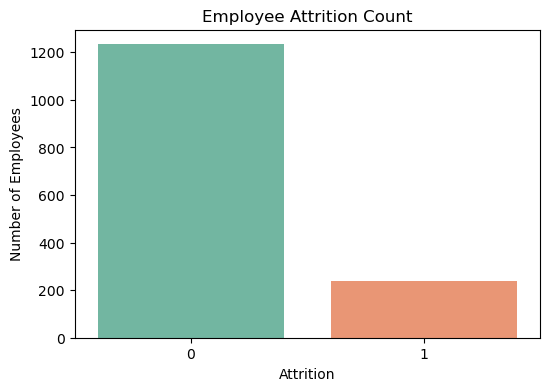

In [21]:
# Plotting
plt.figure(figsize=(6, 4))
sns.countplot(x='Attrition', data=df, palette='Set2')

plt.title('Employee Attrition Count')
plt.xlabel('Attrition')
plt.ylabel('Number of Employees')
plt.show()

 Exploratory Data Analysis (EDA)

In [ ]:
📌 1. KDE Plots (Density Estimation)

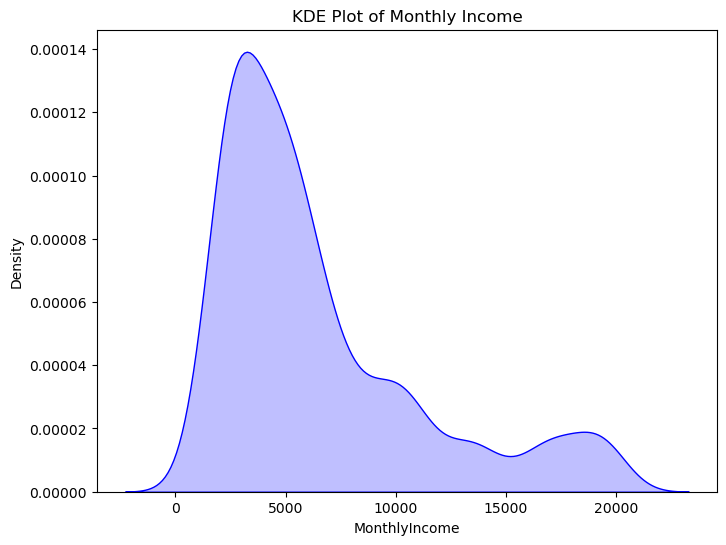

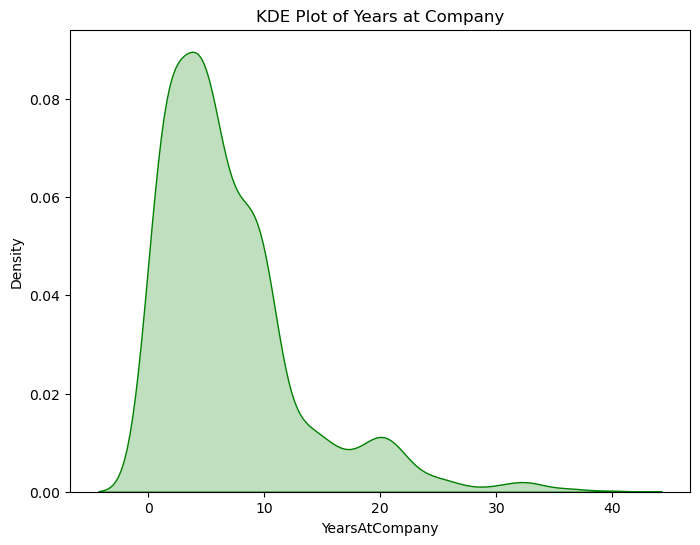

In [41]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df["MonthlyIncome"], fill=True, color="blue")
plt.title("KDE Plot of Monthly Income")
plt.show()

plt.figure(figsize=(8, 6))
sns.kdeplot(df["YearsAtCompany"], fill=True, color="green")
plt.title("KDE Plot of Years at Company")
plt.show()


In [ ]:
📌 2. Violin Plots (Distribution & Outliers)

C:\Users\Ramu M\AppData\Local\Temp\ipykernel_27540\3099110743.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df["Attrition"], y=df["MonthlyIncome"], palette="muted")


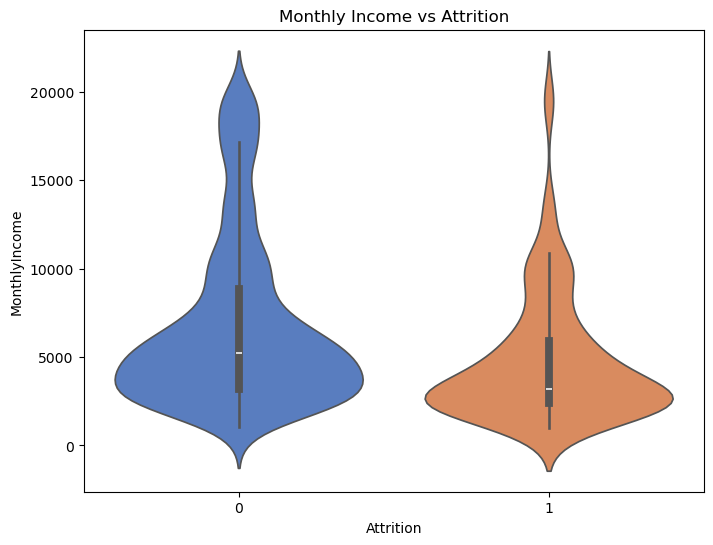

C:\Users\Ramu M\AppData\Local\Temp\ipykernel_27540\3099110743.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df["JobLevel"], y=df["YearsAtCompany"], palette="coolwarm")


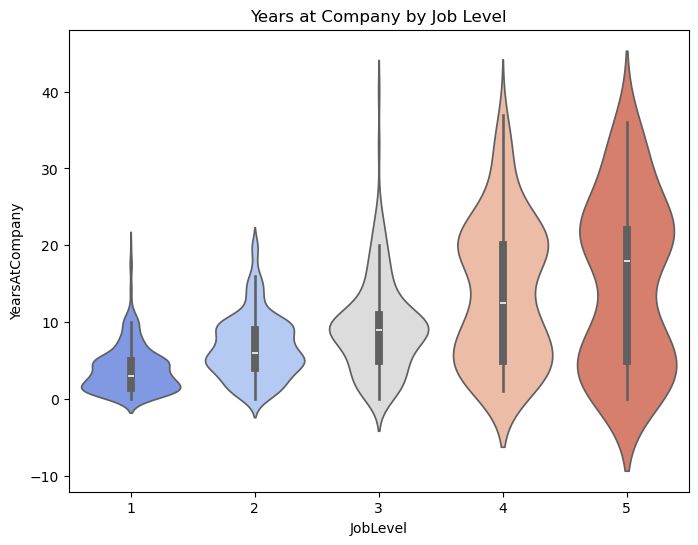

In [42]:
plt.figure(figsize=(8, 6))
sns.violinplot(x=df["Attrition"], y=df["MonthlyIncome"], palette="muted")
plt.title("Monthly Income vs Attrition")
plt.show()

plt.figure(figsize=(8, 6))
sns.violinplot(x=df["JobLevel"], y=df["YearsAtCompany"], palette="coolwarm")
plt.title("Years at Company by Job Level")
plt.show()


In [ ]:
📌 3. Bar Charts (Categorical Feature Breakdown)

C:\Users\Ramu M\AppData\Local\Temp\ipykernel_27540\347800648.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["JobLevel"], y=df["MonthlyIncome"], palette="viridis")


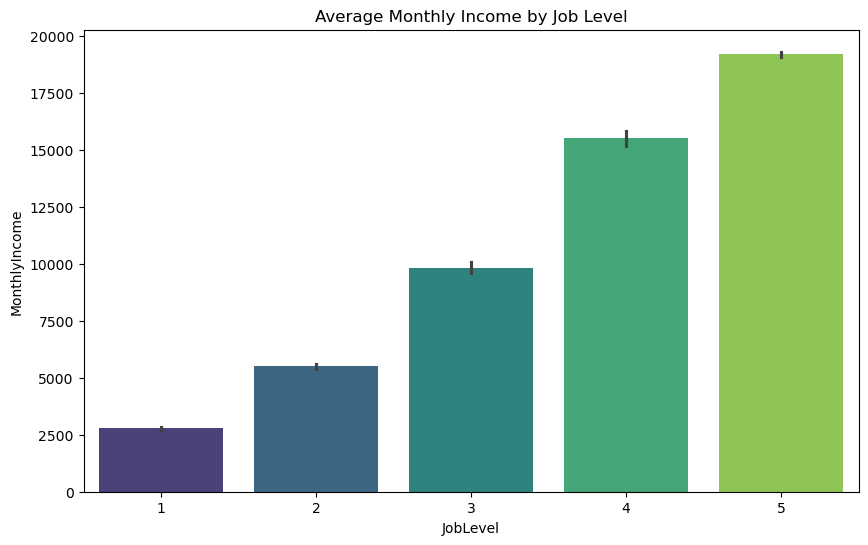

C:\Users\Ramu M\AppData\Local\Temp\ipykernel_27540\347800648.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["Education"], y=df["MonthlyIncome"], palette="magma")


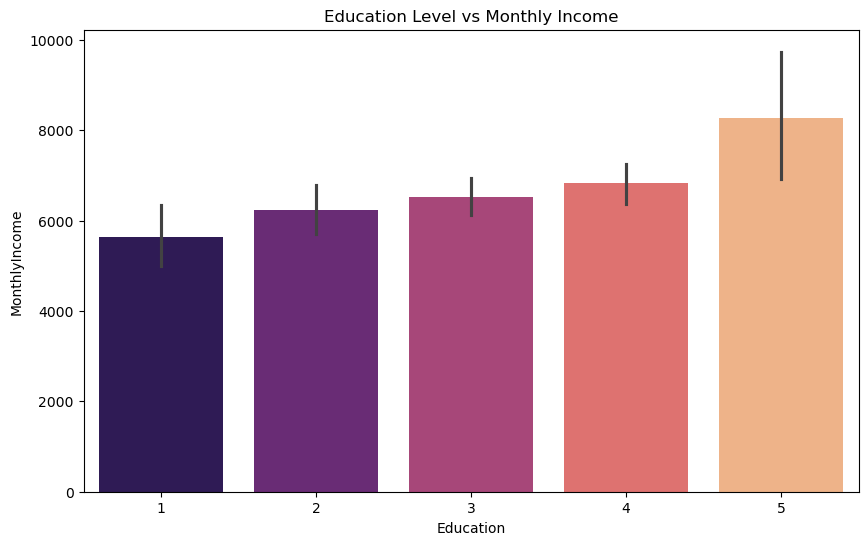

In [43]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df["JobLevel"], y=df["MonthlyIncome"], palette="viridis")
plt.title("Average Monthly Income by Job Level")
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=df["Education"], y=df["MonthlyIncome"], palette="magma")
plt.title("Education Level vs Monthly Income")
plt.show()


In [ ]:
📌 4. Pairplot (Feature Interactions)

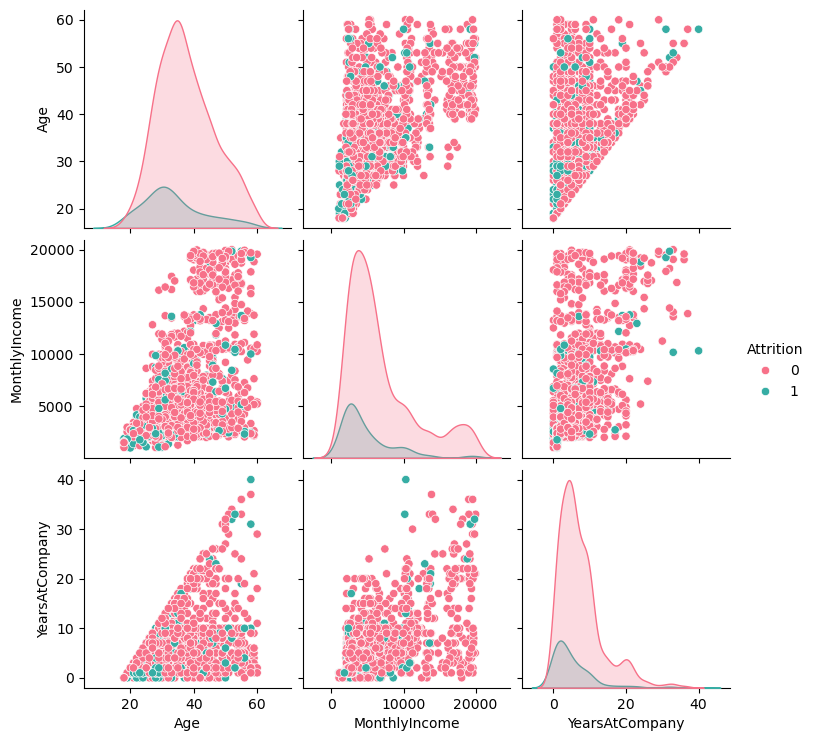

In [44]:
sns.pairplot(df[['Age', 'MonthlyIncome', 'YearsAtCompany', 'Attrition']], hue="Attrition", palette="husl")
plt.show()


In [ ]:
📌 5. Attrition Breakdown (Pie Chart)

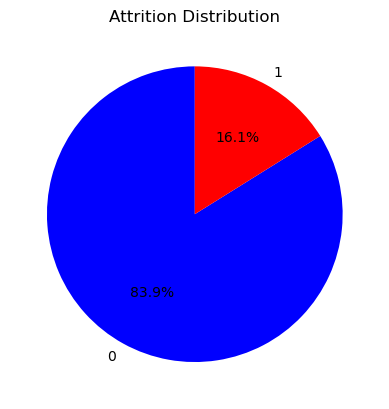

In [45]:
df["Attrition"].value_counts().plot.pie(autopct="%1.1f%%", colors=["blue", "red"], startangle=90)
plt.title("Attrition Distribution")
plt.ylabel("")  # Hide y-label
plt.show()


In [ ]:
📌 6. Attrition vs Work-Life Balance

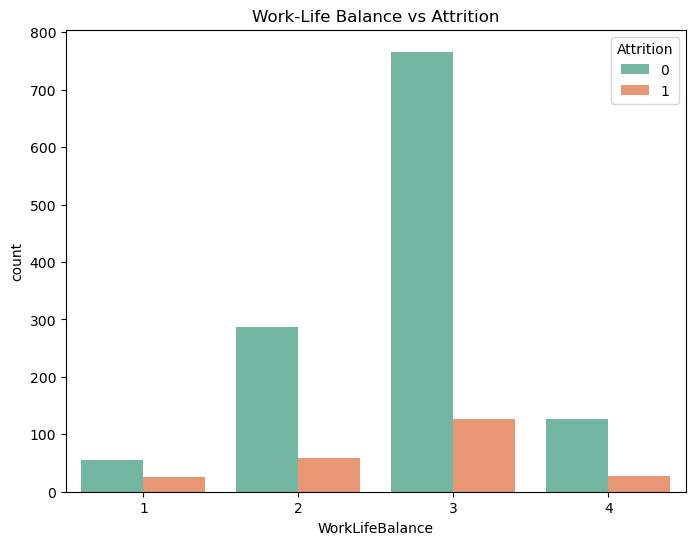

In [46]:
plt.figure(figsize=(8, 6))
sns.countplot(x=df["WorkLifeBalance"], hue=df["Attrition"], palette="Set2")
plt.title("Work-Life Balance vs Attrition")
plt.show()


In [ ]:
📌 7. Swarm Plot (Attrition vs Monthly Income)

C:\Users\Ramu M\AppData\Local\Temp\ipykernel_27540\557912578.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x=df["Attrition"], y=df["MonthlyIncome"], palette="coolwarm")
C:\Users\Ramu M\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 13.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


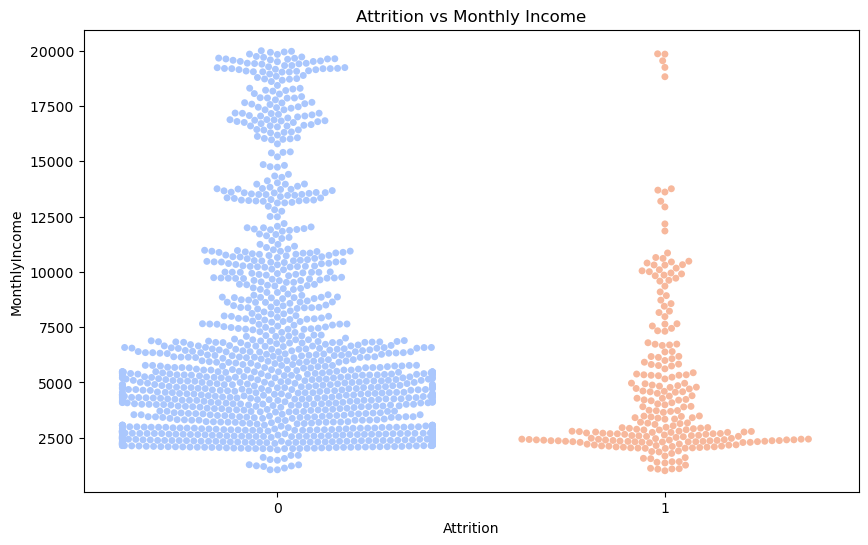

In [48]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x=df["Attrition"], y=df["MonthlyIncome"], palette="coolwarm")
plt.title("Attrition vs Monthly Income")
plt.show()


In [ ]:
📌 8. Strip Plot (Attrition vs Years at Company)

C:\Users\Ramu M\AppData\Local\Temp\ipykernel_14260\2532846547.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x=df["Attrition"], y=df["YearsAtCompany"], jitter=True, palette="muted")


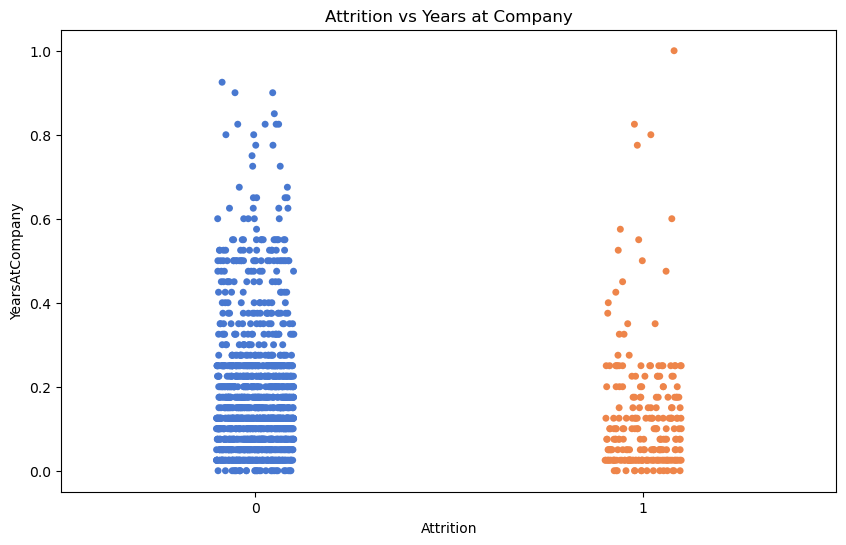

In [29]:
plt.figure(figsize=(10, 6))
sns.stripplot(x=df["Attrition"], y=df["YearsAtCompany"], jitter=True, palette="muted")
plt.title("Attrition vs Years at Company")
plt.show()


In [ ]:
📌 9. Countplot (Job Role Distribution by Attrition)

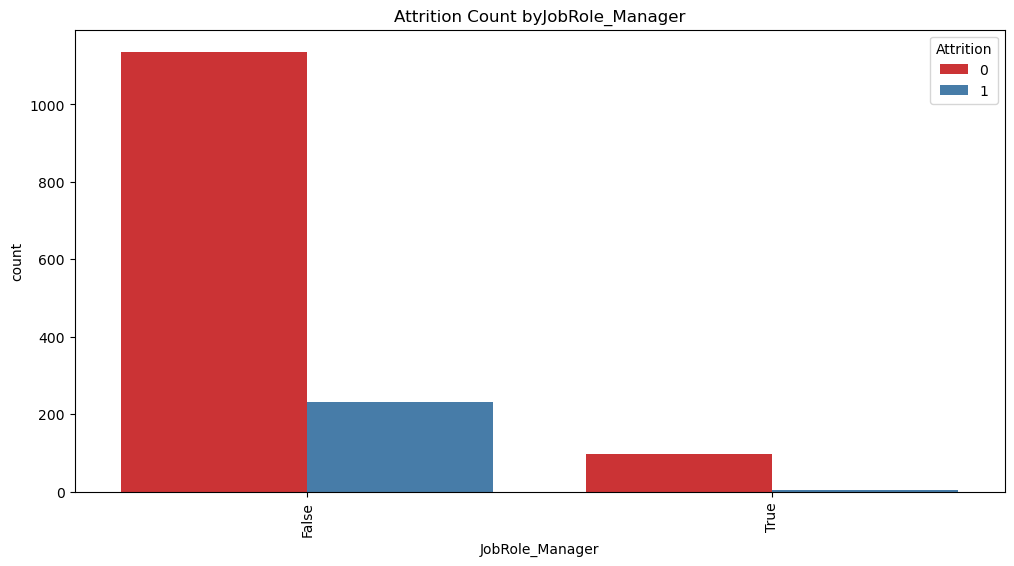

In [31]:
plt.figure(figsize=(12, 6))
sns.countplot(x=df["JobRole_Manager"], hue=df["Attrition"], palette="Set1")
plt.xticks(rotation=90)
plt.title("Attrition Count byJobRole_Manager")
plt.show()


In [ ]:
📌 10. Boxplot (Monthly Income by Job Level & Attrition)

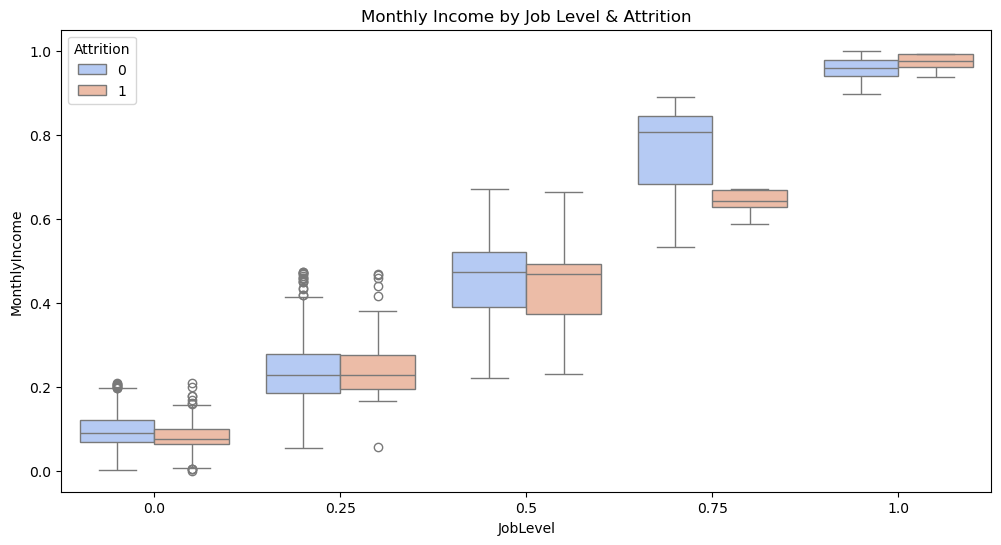

In [32]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["JobLevel"], y=df["MonthlyIncome"], hue=df["Attrition"], palette="coolwarm")
plt.title("Monthly Income by Job Level & Attrition")
plt.show()


In [ ]:
📌 11. Heatmap (Feature Correlations with Attrition)

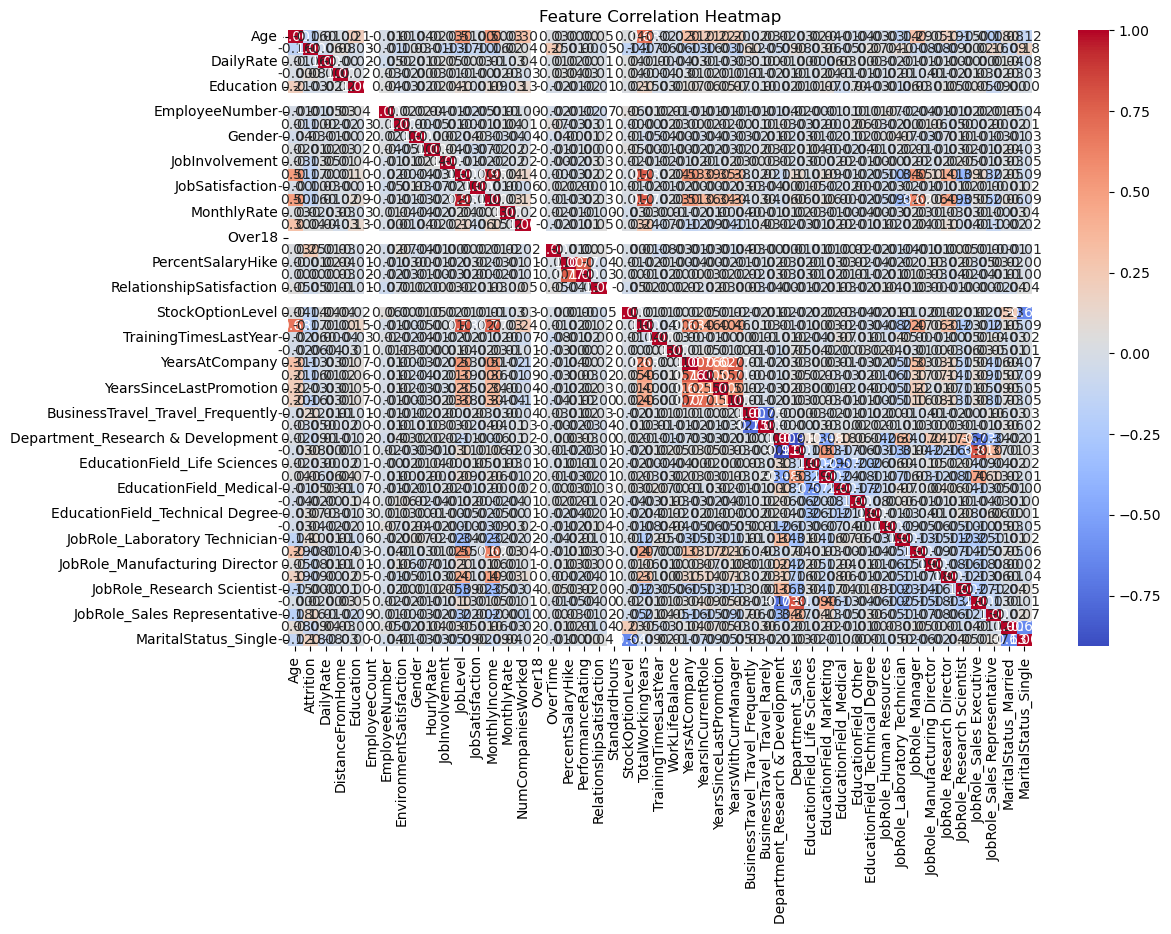

In [34]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
📌 12. Pairplot (Multi-Feature Relationship with Attrition)

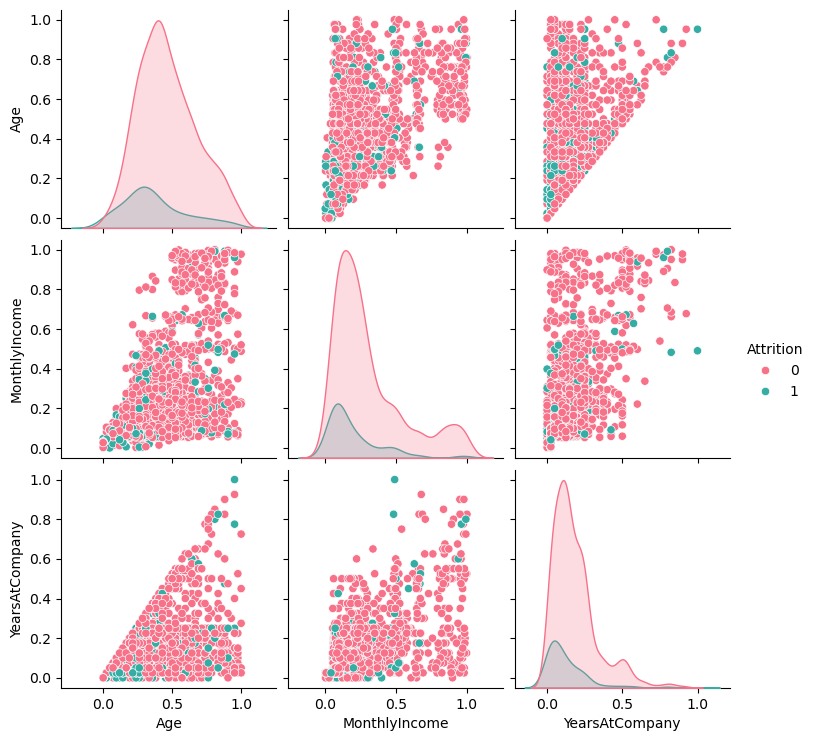

In [35]:
sns.pairplot(df[["Age", "MonthlyIncome", "YearsAtCompany", "Attrition"]], hue="Attrition", palette="husl")
plt.show()


Feature Engineering 

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report


In [23]:
from imblearn.over_sampling import RandomOverSampler

# Drop multiple columns by passing them as a list
X = df.drop(['Attrition', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
             'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
             'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
             'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating'], axis=1)

y = df['Attrition']

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)


In [24]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

print(y_resampled.value_counts())

Attrition
1    1233
0    1233
Name: count, dtype: int64


In [25]:
# Now perform train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

In [26]:
print("Training Set:", X_train.shape)
print("Testing Set:", X_test.shape)

Training Set: (1972, 19)
Testing Set: (494, 19)


In [27]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Detailed Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.87
Confusion Matrix:
 [[254   1]
 [ 36   3]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93       255
           1       0.75      0.08      0.14        39

    accuracy                           0.87       294
   macro avg       0.81      0.54      0.54       294
weighted avg       0.86      0.87      0.83       294



C:\Users\Ramu M\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Train a Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate Model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9554655870445344
              precision    recall  f1-score   support

           0       0.99      0.92      0.95       247
           1       0.93      0.99      0.96       247

    accuracy                           0.96       494
   macro avg       0.96      0.96      0.96       494
weighted avg       0.96      0.96      0.96       494

Confusion Matrix:
 [[228  19]
 [  3 244]]


In [30]:
print(f"Accuracy is {round(accuracy_score(y_test, model.predict(X_test))*100, 2)}%")

Accuracy is 95.55%


In [33]:
df.iloc[1].tolist()

[49,
 0,
 1,
 279,
 1,
 8,
 1,
 1,
 1,
 2,
 3,
 1,
 61,
 2,
 2,
 6,
 2,
 1,
 5130,
 24907,
 1,
 0,
 0,
 23,
 4,
 4,
 80,
 1,
 10,
 3,
 3,
 10,
 7,
 1,
 7]

In [34]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [35]:
import numpy as np
import pandas as pd

# ✅ Use the same feature order as used during model training
feature_names = X.columns.tolist()  # Make sure this matches the trained model's features

# 🔹 Sample employee input data (change values as needed)
input_data = pd.DataFrame([[
    41,       # Age
    2,        # BusinessTravel (Encoded)
    1102,     # DailyRate
    2,        # Department (Encoded)
    1,        # DistanceFromHome
    2,        # Education
    1,        # EducationField (Encoded)
    1,        # EmployeeCount
    1,        # EmployeeNumber
    # ... continue with all remaining values, total must match len(feature_names)
    # (Fill in exactly as your training data expects)
    1,        # RelationshipSatisfaction
    80,       # StandardHours
    0,        # StockOptionLevel
    8,        # TotalWorkingYears
    0,        # TrainingTimesLastYear
    1,        # WorkLifeBalance
    6,        # YearsAtCompany
    4,        # YearsInCurrentRole
    0,        # YearsSinceLastPromotion
    5         # YearsWithCurrManager
]], columns=feature_names)

# 🔍 Predict
prediction = model.predict(input_data)

# 🧠 Interpret result
if prediction[0] == 0:
    print("✅ The model predicts: **Employee will stay (No Attrition)**")
else:
    print("⚠️ The model predicts: **Employee is likely to leave (Attrition)**")


⚠️ The model predicts: **Employee is likely to leave (Attrition)**


In [36]:
X_train.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [37]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [38]:
import numpy as np
import pandas as pd

# ✅ Use the same feature order as used during model training
feature_names = X.columns.tolist()  # Make sure this matches the trained model's features

# 🔹 Sample employee input data (change values as needed)
input_data = pd.DataFrame([
    [49, 1, 279, 1, 8, 1, 1, 1, 2, 4, 80, 1, 10, 3, 3, 10, 7, 1, 7]
], columns=feature_names)

# 🔍 Predict
prediction = model.predict(input_data)

# 🧠 Interpret result
if prediction[0] == 0:
    print("✅ The model predicts: **Employee will stay (No Attrition)**")
else:
    print("⚠️ The model predicts: **Employee is likely to leave (Attrition)**")


✅ The model predicts: **Employee will stay (No Attrition)**


In [39]:
import pickle

pickle.dump(model, open("employee_prediction.pkl", 'wb'))

In [40]:
# loading the saved model
loaded_model = pickle.load(open('employee_prediction.pkl', 'rb'))

In [41]:
for column in X.columns:
  print(column)

Age
BusinessTravel
DailyRate
Department
DistanceFromHome
Education
EducationField
EmployeeCount
EmployeeNumber
RelationshipSatisfaction
StandardHours
StockOptionLevel
TotalWorkingYears
TrainingTimesLastYear
WorkLifeBalance
YearsAtCompany
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager
